In [1]:
import tensorflow as tf
import numpy as np
import json
import os
import matplotlib.pyplot as plt

2025-06-27 20:26:18.701093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
def create_simple_model(input_shape=(10,)):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.MSE, metrics=['mae'])
    return model

In [3]:
# Function to save a model
def save_model(model, path):
    model.save(path)
    print(f"Model saved to {path}")

In [4]:
# Function to load a model
def load_model(path):
    model = tf.keras.models.load_model(path)
    print(f"Model loaded from {path}")
    return model

In [5]:
# Function to save training history to JSON
def save_history(history, path):
    with open(path, 'w') as f:
        json.dump(history.history, f)
    print(f"History saved to {path}")

In [6]:
# Function to load training history from JSON
def load_history(path):
    with open(path, 'r') as f:
        history = json.load(f)
    print(f"History loaded from {path}")
    return history

In [7]:
# Utility: Plotting training history
def plot_history(history_dict):
    plt.figure(figsize=(8,4))
    for key in history_dict:
        plt.plot(history_dict[key], label=key)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Training History')
    plt.show()

# Demo

In [17]:
# Demonstration: Train, save, and load model and history
model = create_simple_model()
x = np.random.rand(100, 10)
y = np.random.rand(100, 1)
history = model.fit(x, y, epochs=5, validation_split=0.2, verbose=0)

/opt/conda/envs/py39_tensorflow/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Save model and history
save_model(model, "./Data/demo_model.h5")
save_history(history, "./Data/demo_history.json")

Model saved to ./Data/demo_model.h5
History saved to ./Data/demo_history.json


In [20]:
# Load model and history
loaded_model = load_model("./Data/demo_model.h5")
loaded_history = load_history("./Data/demo_history.json")

Model loaded from ./Data/demo_model.h5
History loaded from ./Data/demo_history.json


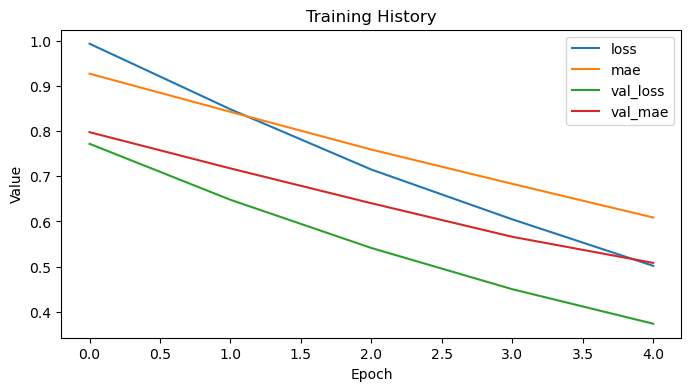

In [21]:
# Plot loaded training history
plot_history(loaded_history)